<a href="https://colab.research.google.com/github/radubhattarai/Introduction-to-AI-Algorithms-/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


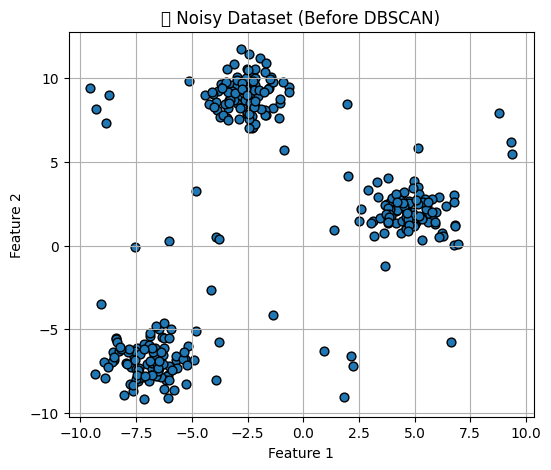

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


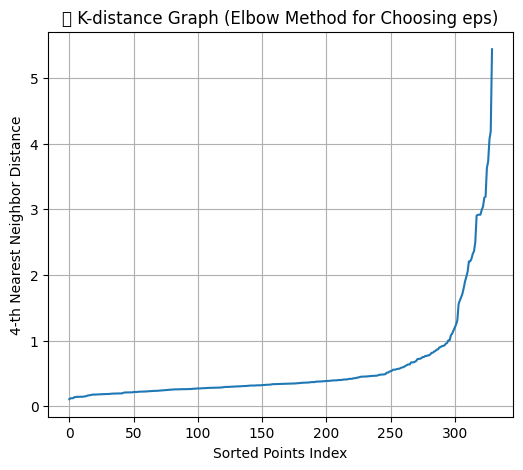

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129529 (\N{BROOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


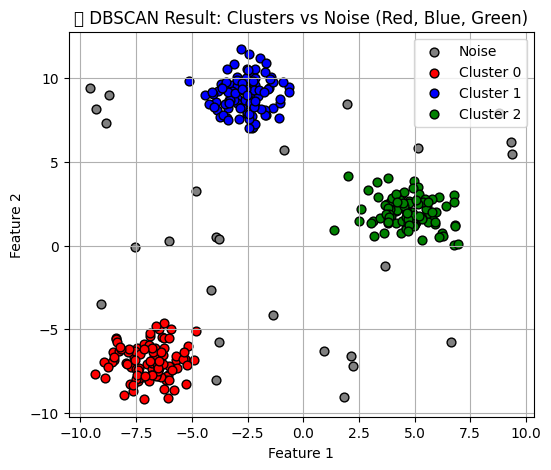

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


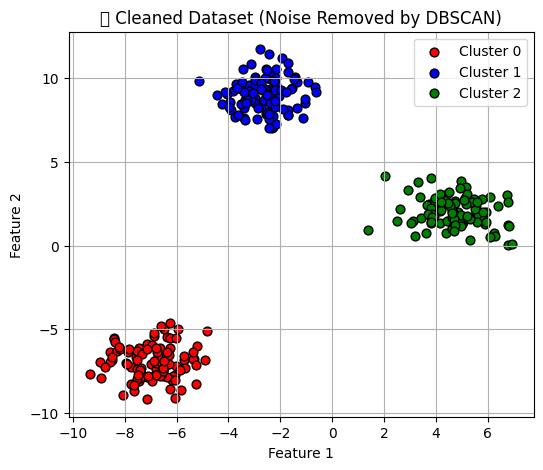

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# Step 1: Generate 2D data with noise
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Add uniform random noise
rng = np.random.RandomState(42)
noise = rng.uniform(low=-10, high=10, size=(30, 2))
X_noisy = np.vstack([X, noise])

# Step 2: Visualize raw noisy data
plt.figure(figsize=(6, 5))
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], s=40, edgecolor='k')
plt.title("📌 Noisy Dataset (Before DBSCAN)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# Step 3: K-distance plot to find elbow (for eps)
k = 4  # usually min_samples - 1
nbrs = NearestNeighbors(n_neighbors=k).fit(X_noisy)
distances, _ = nbrs.kneighbors(X_noisy)
k_distances = np.sort(distances[:, -1])

# Plot elbow curve
plt.figure(figsize=(6, 5))
plt.plot(k_distances)
plt.title("🔍 K-distance Graph (Elbow Method for Choosing eps)")
plt.xlabel("Sorted Points Index")
plt.ylabel(f"{k}-th Nearest Neighbor Distance")
plt.grid(True)
plt.show()

# Step 4: Apply DBSCAN
eps_value = 1.25  # Picked based on elbow plot
db = DBSCAN(eps=eps_value, min_samples=5)
labels = db.fit_predict(X_noisy)

# Step 5: Visualize DBSCAN result properly
# Step 5: Visualize DBSCAN result with red, blue, green clusters
plt.figure(figsize=(6, 5))

# Define colors for up to 3 clusters
colors = ['red', 'blue', 'green']
cluster_idx = 0

# Plot clusters
for label in sorted(set(labels)):
    if label == -1:
        # Noise points
        plt.scatter(X_noisy[labels == -1][:, 0], X_noisy[labels == -1][:, 1],
                    color='gray', label='Noise', s=40, edgecolor='k')
    else:
        plt.scatter(X_noisy[labels == label][:, 0], X_noisy[labels == label][:, 1],
                    color=colors[cluster_idx], label=f'Cluster {label}', s=40, edgecolor='k')
        cluster_idx += 1

plt.title("🧹 DBSCAN Result: Clusters vs Noise (Red, Blue, Green)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Remove noise and visualize cleaned data (clusters only)
non_noise_mask = labels != -1
X_clean = X_noisy[non_noise_mask]
labels_clean = labels[non_noise_mask]

plt.figure(figsize=(6, 5))

# Use same color map: red, blue, green
colors = ['red', 'blue', 'green']
cluster_idx = 0

for label in sorted(set(labels_clean)):
    plt.scatter(X_clean[labels_clean == label][:, 0],
                X_clean[labels_clean == label][:, 1],
                color=colors[cluster_idx],
                label=f'Cluster {label}', s=40, edgecolor='k')
    cluster_idx += 1

plt.title("✅ Cleaned Dataset (Noise Removed by DBSCAN)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()